# Chapter 4. Methodology

<font size=3> **In this section, I will calculate the frequency of each venue category in each city. Then the similarity distance of each city can be obtained.** </font>

## 4.1 import python dependency packages

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


## 4.2 Load dataset

In [2]:
Toronto_venues=pd.read_csv('toronto_venues.csv')
SH_venues=pd.read_csv('SH_venues.csv')
NewYork_venues=pd.read_csv('NewYork_venues.csv')
London_venues=pd.read_csv('London_venues.csv')
Frankfurt_venues=pd.read_csv('Frankfurt_venues.csv')
print('Toronto_venues.shape is ',Toronto_venues.shape)
print('SH_venues.shape is ',SH_venues.shape)
print('NewYork_venues.shape is ',NewYork_venues.shape)
print('London_venues.shape is ',London_venues.shape)
print('Frankfurt_venues.shape is ',Frankfurt_venues.shape)

Toronto_venues.shape is  (2115, 7)
SH_venues.shape is  (1128, 7)
NewYork_venues.shape is  (4665, 7)
London_venues.shape is  (3429, 7)
Frankfurt_venues.shape is  (1768, 7)


## 4.3 Modeling

**Calculate the frequency of each venue category in each city**

- Gather all Categories among these five cities.

In [3]:
# All Categories among these five cities.
allCats=list(set(Toronto_venues['Venue Category'].values.tolist()+SH_venues['Venue Category'].values.tolist()+NewYork_venues['Venue Category'].values.tolist()+London_venues['Venue Category'].values.tolist()+Frankfurt_venues['Venue Category'].values.tolist()))
len(allCats)

498

- Calculate frequency.

In [4]:
def gen_Freqency(cityName,allCats,dFrame):
    ansFrame=pd.DataFrame([[cityName]],columns=['City'])
    for cat in allCats:
        filterFrame=dFrame[dFrame['Venue Category']==cat]
        freq=filterFrame.shape[0]/dFrame.shape[0]
        ansFrame[cat]=freq
    return ansFrame

In [5]:
Toronto_Freq=gen_Freqency('Toronto',allCats,Toronto_venues)

In [6]:
# Take a look
Toronto_Freq

,City,Gelato Shop,Movie Theater,Video Store,Hotel Bar,Park,Tree,Mini Golf,Tibetan Restaurant,Cosmetics Shop,...,Turkish Restaurant,Himalayan Restaurant,Zoo Exhibit,Boxing Gym,Beer Garden,Bowling Alley,Ukrainian Restaurant,Mediterranean Restaurant,Street Food Gathering,Clothing Store
0,Toronto,0.0,0.003783,0.0,0.000946,0.025059,0.0,0.0,0.000473,0.006147,...,0.000473,0.0,0.0,0.0,0.0,0.0,0.0,0.002837,0.0,0.016076


- Merge values.

In [7]:
Shanghai_Freq=gen_Freqency('Shanghai',allCats,SH_venues)
London_Freq=gen_Freqency('London',allCats,London_venues)
NewYork_Freq=gen_Freqency('NewYork',allCats,NewYork_venues)
Frankfurt_Freq=gen_Freqency('Frankfurt',allCats,Frankfurt_venues)

In [8]:
all_Freq=pd.concat([Shanghai_Freq,London_Freq,NewYork_Freq,Frankfurt_Freq,Toronto_Freq])

In [9]:
all_Freq.index=all_Freq['City'].values
all_Freq=all_Freq.drop(['City'],axis=1)
all_Freq

,Gelato Shop,Movie Theater,Video Store,Hotel Bar,Park,Tree,Mini Golf,Tibetan Restaurant,Cosmetics Shop,Thrift / Vintage Store,...,Turkish Restaurant,Himalayan Restaurant,Zoo Exhibit,Boxing Gym,Beer Garden,Bowling Alley,Ukrainian Restaurant,Mediterranean Restaurant,Street Food Gathering,Clothing Store
Shanghai,0.000000,0.007092,0.001773,0.013298,0.016844,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002660,0.000000,0.000000,0.000000,0.000887,0.000000,0.000000,0.002660,0.000887,0.013298
London,0.000583,0.003791,0.000000,0.002333,0.016331,0.000000,0.000292,0.000000,0.003500,0.001458,...,0.008457,0.000292,0.000000,0.001167,0.000292,0.000583,0.000000,0.004374,0.001750,0.018081
NewYork,0.000000,0.002144,0.000857,0.000429,0.020793,0.000214,0.000000,0.000000,0.008146,0.001929,...,0.001072,0.000000,0.000000,0.000429,0.001501,0.000214,0.000214,0.005573,0.000000,0.006431
Frankfurt,0.000000,0.000000,0.000000,0.005090,0.029412,0.000000,0.000566,0.001131,0.000000,0.000000,...,0.005656,0.000000,0.000566,0.000566,0.005656,0.002262,0.000000,0.002262,0.000000,0.007353
Toronto,0.000000,0.003783,0.000000,0.000946,0.025059,0.000000,0.000000,0.000473,0.006147,0.000473,...,0.000473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002837,0.000000,0.016076


## 4.4 Evaluation

**Compute pairwise correlation of cities according to venue category frequency values.**

In [10]:
city_corr=all_Freq.T.corr()
city_corr

,Shanghai,London,NewYork,Frankfurt,Toronto
Shanghai,1.000000,0.636168,0.558532,0.480385,0.729699
London,0.636168,1.000000,0.637411,0.611683,0.791106
NewYork,0.558532,0.637411,1.000000,0.544476,0.727447
Frankfurt,0.480385,0.611683,0.544476,1.000000,0.574084
Toronto,0.729699,0.791106,0.727447,0.574084,1.000000


**Plotting a heatmap correlation matrix**

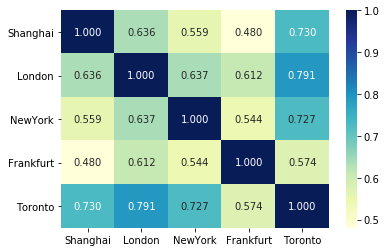

In [11]:
sns.heatmap(city_corr,annot=True, fmt=".3f",cmap="YlGnBu")

# Chapter 5. Results

<font size=3>According to *city_corr*,we can find that the similarity of the 5 cities in descending order is:
    1. Toronto-London: 0.791 （Correlation coefficient）
    2. Toronto-Shanghai:0.730
    3. Toronto-NewYork :0.727 
    4. NewYork-London: 0.637
    5. London-Shanghai:0.636
    6. Frankfurt-London:0.612
    7. Toronto-Frankfurt:0.574
    8. NewYork-Shanghai :0.559
    9. Frankfurt-NewYork: 0.544
    10. Frankfurt-Shanghai: 0.480
</font>


# Chapter 6. Discussion 

Let's take a look at Toronto-London venue frequency dataset to explore something interesting.

In [12]:
Toronto_Freq_dis=Toronto_Freq.drop(['City'],axis=1).T
Toronto_Freq_dis.columns=['coefficient']
Toronto_Freq_dis.sort_values(by=['coefficient'],ascending=False).head(10)

,coefficient
Coffee Shop,0.085579
Café,0.043972
Restaurant,0.031678
Park,0.025059
Bakery,0.022222
Pizza Place,0.021749
Italian Restaurant,0.021277
Sandwich Place,0.020331
Japanese Restaurant,0.019858
Hotel,0.018440


In [13]:
London_Freq_dis=London_Freq.drop(['City'],axis=1).T
London_Freq_dis.columns=['coefficient']
London_Freq_dis.sort_values(by=['coefficient'],ascending=False).head(10)

,coefficient
Pub,0.066492
Coffee Shop,0.063575
Café,0.054826
Grocery Store,0.040537
Hotel,0.031788
Italian Restaurant,0.024205
Pizza Place,0.023914
Gym / Fitness Center,0.022747
Sandwich Place,0.021289
Bakery,0.020122


<font size=3>**Now, we can intuitively see that the most frequent venues in these two cities are highly similar. This reflects the high similarity in the working environment, lifestyle and entertainment styles of the two cities**</font>

# Chapter 7. Conclusion

<font size=3>
    For given metropolitan cities,I explored the similarity of them from the perspective of venue distribution. After web crawling, cleaning, feature acquisition and data integration, I obtain the location distribution and category of the venue in each district of a city. I calculated the frequency of the venue category in different cities and generated a correlation matrix between cities.
</font>    
    
<font size=3>I prefer to think that the higher correlation coefficient of the venue occur frequency  represents the higher similarity in the working environment, lifestyle and entertainment styles of the two cities.Therefore,for these five cities I explored in this assignment, **Toronto，Canada and London，the United Kingdom are the most similar, Frankfurt,Germany and Shanghai,China are the least similar.** For other cities in the world,I think my assignment can still be used as an effective solution for calculating city similarity.
</font>